In [18]:
import numpy as np
import matplotlib.pyplot as plt
# import scipy as sp

np.set_printoptions(precision=4, suppress=True)

# Q.1 

In [19]:
#Given Matrix
A = np.array(
    [
        [   4, 2/3, -4/3, 4/3],
        [ 2/3,   4,    0,   0],
        [-4/3,   0,    6,   2],
        [ 4/3,   0,    2,   6]
    ]
)

# <h3> Power Method

In [20]:
from library.eigen import power_method
e_val, evec, it = power_method(A, 1e-5, max_iterations=100, seed=22)
print("Using Power method to find the dominant eigenvalue and eigenvector")
print(f"Eigenvalue: {e_val:.2f}")
print(f"Eigenvector: {evec}")
print(f"Converged within {it} iterations")

Using Power method to find the dominant eigenvalue and eigenvector
Eigenvalue: 8.00
Eigenvector: [0.     0.     0.7071 0.7071]
Converged within 33 iterations


# <h3> QR Decomposition

In [21]:
from library.eigen import qr_method
e_vals, it = qr_method(A, tolerance=1e-5, max_iteration=20)
print("Using QR method to find the eigenvalues")
print(f"Eigenvalues: {e_vals}")
print(f"Converged within {it} iterations")

Using QR method to find the eigenvalues
Eigenvalues: [6. 4. 8. 2.]
Converged within 17 iterations


# Q.2

In [22]:
from library.fitting import mypolyfit#, mypolyfit_custom_basis

filename = "../assignments/assign3fit.txt"
data = np.loadtxt(filename)
x = data[:, 0]
y = data[:, 1]

### basic polynomial fit

a0 = 0.5747
a1 = 4.7259
a2 = -11.1282
a3 = 7.6687


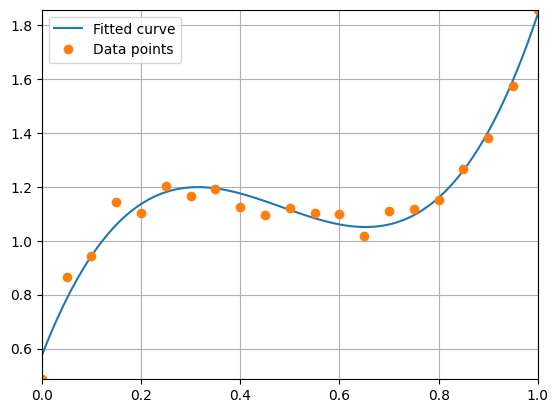

In [23]:
w, A_pol = mypolyfit(x, y, degree=3)
for i, wi in enumerate(w): print(f"a{i} = {wi:.4f}")

# plotting the fit
space = np.linspace(min(x), max(x), 100)
ys = np.polyval(w[::-1], space)  # elegant way of writing y = w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3
plt.plot(space, ys, label="Fitted curve")
plt.plot(x, y, 'o', label="Data points")
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
plt.legend()
plt.grid()

a0 = 1.1610
a1 = 0.3935
a2 = 0.0468
a3 = 0.2396


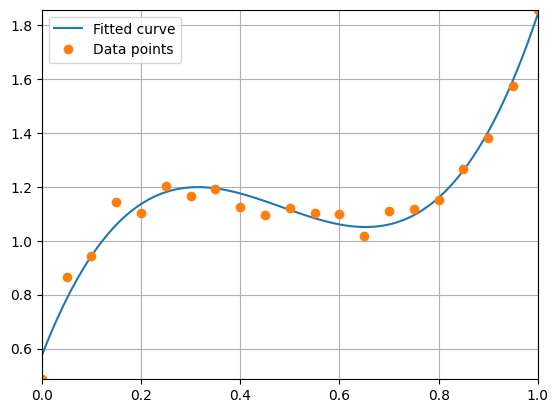

In [24]:
phis = [
    lambda x: 1,
    lambda x: 2*x-1,
    lambda x: 8*x**2 - 8*x + 1,
    lambda x: 32*x**3 - 48*x**2 + 18*x - 1
]

w, A_bas = mypolyfit(x, y, degree=3, basis=phis)
for i, wi in enumerate(w): print(f"a{i} = {wi:.4f}")

# plotting the fitted curve
space = np.linspace(min(x), max(x), 100)
ys = w[0]*phis[0](space) + w[1]*phis[1](space) + w[2]*phis[2](space) + w[3]*phis[3](space)
plt.plot(space, ys, label="Fitted curve")
plt.plot(x, y, 'o', label="Data points")
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
plt.legend()
plt.grid()

# <h3> Comparison of condition number

In [25]:
cn_poly = np.linalg.cond(A_pol)
cn_chev = np.linalg.cond(A_bas)

print(f"Condition number for basic polynomial fit: {cn_poly}")
print(f"Condition number for changed basis poly fit: {cn_chev}")

Condition number for basic polynomial fit: 12104.94867103172
Condition number for changed basis poly fit: 3.8561465786155793


The condition number of the normal polynomial fit is much larger than that of the modified Chebyshev polynomial fit, which suggests that the later provides a more stable solution compared to the former.

# Q.3

Text(0, 0.5, 'Number of Students')

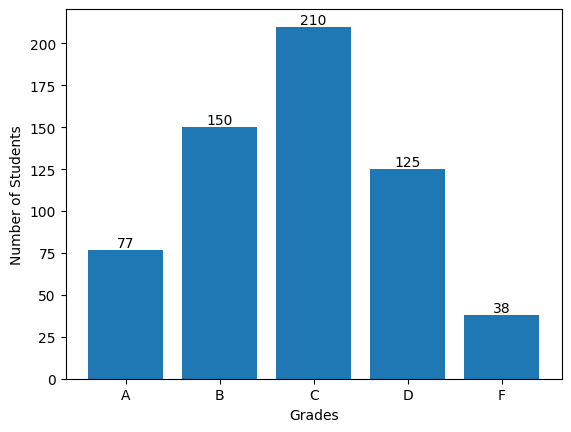

In [26]:
# data
grade_names = ['A', 'B', 'C', 'D', 'F']
grades = np.array([1, 2, 3, 4, 5])
dist = np.array([77, 150, 210, 125, 38])

rects = plt.bar(grade_names, dist)
plt.bar_label(rects)
plt.xlabel('Grades')
plt.ylabel('Number of Students')

We had to convert the grade points to some numerical values. While doing this conversion we asumed two things:
- The grade points are equally spaced
- The grade points are ordered in the sequence.

According to the above assumptions, a lot of mappings could have been followed. We choose the following mapping:
- A -> 1
- B -> 2
- C -> 3
- D -> 4
- F -> 5

In [27]:
def mean_std(grades, dist):  # given frequency distribution
    mean = np.sum(grades * dist) / np.sum(dist)
    squared_deviations = (grades - mean) ** 2
    variance = np.sum(squared_deviations * dist) / np.sum(dist)
    return mean, np.sqrt(variance)

N = sum(dist)
mean, std = mean_std(grades, dist)

mean = 2.828333333333333, std = 1.0934031989872517


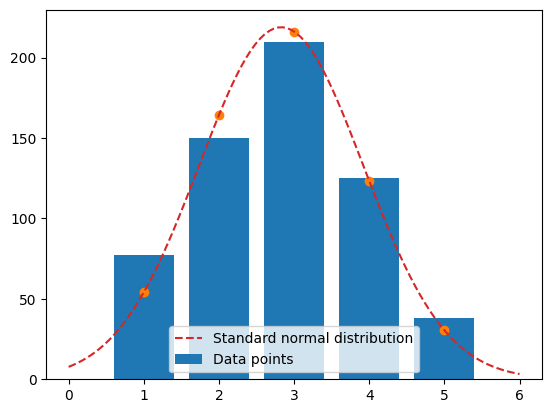

In [28]:
def normal_dist(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)
print(f"{mean = }, {std = }")
plt.bar(grades, dist, color='tab:blue', label="Data points")
# x = grades
ys = normal_dist(grades, mean, std)
plt.plot(grades, ys*N,"tab:orange", marker="o", linestyle="")
model_x_ = np.linspace(0, 6, 100)
model_y_ = normal_dist(model_x_, mean, std)
plt.plot(model_x_, model_y_*N, "tab:red", linestyle="--", label="Standard normal distribution")
plt.legend()

In [29]:
u = normal_dist(grades, mean, std)
E = N * u  # expected frequencies
O = dist  # observed frequencies
diff_squared = (O - E)**2
chi_squares = diff_squared / E
chi_square = np.sum(chi_squares)
print(f"Chi-square value: {chi_square}")

Chi-square value: 13.021111414367823


In [30]:
# # preparing table
# # cols = [grades, u, E, O, diff_squared, chi_squares]
# rows = len(grades)
# cols = {
#     "Face Value": [f"{grades[i]} ({grade_names[i]})" for i in range(rows)],
#     "Unbiased Distribution f(x)": u,
#     "Expected freq (E)": E,
#     "Observed freq (O)": O,
#     "$(O-E)^2$": diff_squared,
#     "$\\frac{(O-E)^2}{E}$": chi_squares
# }
# print("|", end=" ")
# for item in cols.keys():
#     print(f"{item} |", end=" ")
# print("\n|:---:|:---:|:---:|:---:|:---:|:---:|")
# for i in range(rows):
#     print("|", end=" ")
#     for item in cols.values():
#         if isinstance(item[i], float):
#             print(f"{item[i]:.2f} |", end=" ")
#         else:
#             print(f"{item[i]} |", end=" ")
#     print()
# print(f"| $\eta =4 $ | | sum = {sum(E):.2f} | sum = {sum(O)} | | $\chi^2 = {chi_square:.2f}$ |")

| Face Value | Unbiased Distribution f(x) | Expected freq (E) | Observed freq (O) | $(O-E)^2$ | $\frac{(O-E)^2}{E}$ | 
|:---:|:---:|:---:|:---:|:---:|:---:|
| 1 (A) | 0.09 | 54.09 | 77 | 524.86 | 9.70 | 
| 2 (B) | 0.27 | 164.31 | 150 | 204.69 | 1.25 | 
| 3 (C) | 0.36 | 216.24 | 210 | 38.89 | 0.18 | 
| 4 (D) | 0.21 | 123.29 | 125 | 2.92 | 0.02 | 
| 5 (F) | 0.05 | 30.46 | 38 | 56.91 | 1.87 | 
| $\eta =4 $ | | sum = 588.38 | sum = 600 | | $\chi^2 = 13.02$ |

So, from the calculation we can see that the $\chi^2$ value is $13.02$.

From the table of $\chi_{crit}^2$ values, we can see that for $\eta = 4$ for 5% significance level, the $\chi_{crit}^2$ value is $9.488$ and for 10% significance level, the $\chi_{crit}^2$ value is $7.779$. In both the cases $\chi^2 > \chi_{crit}^2$ which means that we reject the null hypothesis. Hence, the grade distribution is not unbiased.

**Summary of the results are shown in the attached pdf file too:** [Click Here](asg3.pdf)

# Q.4

In [31]:
# data
f1 = [4.65, 4.84 ,4.59 ,4.75 ,4.63 ,4.75 ,4.58 ,4.82 ,4.86, 4.60, 4.77, 4.65, 4.80]
f2 = [4.75, 4.79,  4.74, 4.74, 4.77, 4.58, 4.81]

In [32]:
# find the mean of two data
mean1 = np.mean(f1)
mean2 = np.mean(f2)

# find the standard deviation of two data
std1 = np.std(f1)
std2 = np.std(f2)

print(f"mean of $f_1={mean1:.3f}$ and $f_2={mean2:.3f}$")
print(f"std of $f_1={std1:.3f}$ and $f_2={std2:.3f}$")

mean of $f_1=4.715$ and $f_2=4.740$
std of $f_1=0.097$ and $f_2=0.070$


# <h4> T-test

In [33]:
n1 = len(f1)
n2 = len(f2)
t = np.abs((mean1 - mean2))/(np.sqrt(std1**2 / n1 + std2**2 / n2))
print("The t value is : ", t)

The t value is :  0.6730653011807353


The t-test is used to determine if there is a significant difference between the means of two groups. We know that the t-value is given by:

$$t = \frac{|\mu_1 - \mu_2|}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

where $\mu_1$ and $\mu_2$ are the means of the two groups, $s_1$ and $s_2$ are the standard deviations of the two groups, and $n_1$ and $n_2$ are the number of samples in the two groups.

Here, $\mu_1 = 4.715$ and $\mu_2 = 4.74$ are the means of the two groups, $s_1 = 0.0973$ and $s_2 = 0.0697$ are the standard deviations of the two groups, and $n_1 = 13$ and $n_2 = 7$ are the number of samples in the two groups. So the t-value becomes:

$$t = \frac{|4.715 - 4.74|}{\sqrt{\frac{0.0973^2}{13} + \frac{0.0697^2}{7}}} = 0.673$$

now, we know that the degree of freedom is given by: $DOF=(n_1-1)+(n_2-1)=12+6=18$

Now, at $\alpha = 0.1$, and $DOF = 18$, the $t_{crit}$ value is $2.887$. Since $t < t_{crit}$, we fail to reject the null hypothesis. Hence, we can say that the two groups are **NOT significantly different** and come from the same population.

# <h4> F-test

In [34]:
#find the f value
F = std1**2 / std2**2
print("The F value is : ", F)

The F value is :  1.9499129829446638


the f-test is used to determine if the variances of two groups are significantly different. We know that the f-value is given by:

$$f = \frac{s_1^2}{s_2^2}$$

where $s_1$ and $s_2$ are the standard deviations of the two groups. Here, $s_1 = 0.0973$ and $s_2 = 0.0697$ are the standard deviations of the two groups. So the f-value becomes:

$$f = \frac{0.0973^2}{0.0697^2} = 1.95$$

Now, at $\alpha = 0.1$, and $DOF = 18$, the $f_{crit}$ value is $2.9047$. Since $f < f_{crit}$, we fail to reject the null hypothesis. Hence, we can say that the two groups have been drawn from populations with **equal variances**.

**Summary of the results are shown in the attached pdf file too:** [Click Here](asg3.pdf)